# Analyzing Cannabis Strains

Cannabis is a psychoactive drug originated from the Cannabis plant used for medicinal, recreational, or spiritual purposes. It has a negative reputation, and usage is condemed and deemed illegal in many areas throughout the globe. Its benefits are controversial and more research and development is needed before reaching conclusions in its health-related effects. Many Cannabis strains exist, and they are classified based on the species they encompass (sativa, indica, hybrid) and are named based on taste, color, smell, or the origin of the variety. In this project, we will analyze different strains presented in two [datasets](https://www.kaggle.com/kingburrito666/cannabis-strains). There are 6 features (strain, type, rating, effects, flavor, and description) and 2,351 records (each record representing different strain) in the first dataset and 6 features (strain, type, CBD, THC, daytime/nighttime, and plant length) and 28,420 records (each record representing different cannabis user) in the second dataset.

## 1) Load Data

In [1]:
# import statements
library(ggplot2)
library(dplyr)
library(tidyr)
library(gridExtra)
library(nnet)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



**Dataset 1:**

In [2]:
data1 = read.csv('Data/cannabis.csv')
head(data1)

Strain,Type,Rating,Effects,Flavor,Description
<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus","$100 OG is a 50/50 hybrid strain that packs a strong punch. The name supposedly refers to both its strength and high price when it first started showing up in Hollywood. As a plant, $100 OG tends to produce large dark green buds with few stems. Users report a strong body effect of an indica for pain relief with the more alert, cerebral feeling thanks to its sativa side."
98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel","The ‘98 Aloha White Widow is an especially potent cut of White Widow that has grown in renown alongside Hawaiian legends like Maui Wowie and Kona Gold. This White Widow phenotype reeks of diesel and skunk and has a rich earthy taste with intermittent notes of hash. Its buds are coated in trichomes, giving its dark foliage a lustrous glint to go along with its room-filling odor. This one-hitter-quitter uplifts the mind with mind-bending euphoria that materializes in the body as airy relaxation. ‘98 Aloha White Widow is available from Pua Mana 1st Hawaiian Pakalōlō Seed Bank."
1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody","1024 is a sativa-dominant hybrid bred in Spain by Medical Seeds Co. The breeders claim to guard the secret genetics due to security reasons, but regardless of its genetic heritage, 1024 is a THC powerhouse with a sweet and spicy bouquet. Subtle fruit flavors mix with an herbal musk to produce uplifting sativa effects. One specific phenotype is noted for having a pungent odor that fills a room, similar to burning incense."
13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit","13 Dawgs is a hybrid of G13 and Chemdawg genetics bred by Canadian LP Delta 9 BioTech. The two potent strains mix to create a balance between indica and sativa effects. 13 Dawgs has a sweet earthy musk that brings a blend of woody citrus flavors. The effects of 13 Dawgs induce a happy, relaxed body buzz with a creative and focused mind that counters depression and stimulates the appetite."
24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60% indica-dominant hybrid that combines the legendary LA strain Kosher Kush with champion sativa Tangie to create something quite unique. Growing tall in its vegetative cycle and very stretchy in flower, this one will need an experienced hand when grown indoors. Most phenotypes will exhibit a sweet orange aroma from the Tangie along with the dark coloration of the Kosher Kush, and will offer a strong citrus flavor when smoked or vaped. THC levels range from 18% to 24%; definitely not for novice users!"
3-Bears-Og,indica,0.0,None,None,"3 Bears OG by Mephisto Genetics is an autoflowering cross of Bear OG, Karma’s OG Cut, and Triangle Kush. This indica-dominant strain generates pungent, flavorful buds in a smaller, more manageable plant size. Mephisto Genetics describes 3 Bears OG as a cornerstone to their artisanal collection, blending the best attributes of the fabled OG Kush with a compact, controllable growth structure. The 3 Bears OG has an approximate 70-day growth cycle and offers effects that stimulate the appetite while leading the body toward sleep."


**Dataset 2:**

In [3]:
data2 = read.csv('Data/cannabis1.csv')
head(data2)

Strain,Type,CBD,THC,Daytime.Nighttime,Plant.Length
<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
Liberty-Haze,hybrid,0.0090199570,0.2516319,DT,4.326288
Blueberry-Jack,hybrid,0.0090040505,0.2372953,DT,4.434753
Og-Cheese,hybrid,0.0090024271,0.2323258,DT,4.816522
Blueberry,indica,0.0099925045,0.2147589,DT,6.964816
Kaboom,sativa,0.0005420527,0.2667046,DT,12.680640
Savage-Citrus-Sunshine,hybrid,0.0090123370,0.2414332,DT,4.721909


## 2) Preprocessing

We will use Python for preprocessing, as its tools are simpler and more effective for efficient data wrangling. All preprocessing is executed in [this](Preprocessing.ipynb) notebook.

In [4]:
effects_dummy = read.csv('Data/effects_dummy.csv')
flavors_dummy = read.csv('Data/flavors_dummy.csv')
data = read.csv('Data/cannabis_dummy.csv')
head(data)

Strain,Type,Rating,CBD,THC,Plant.Length,Daytime.Nighttime,E.Talkative,E.Giggly,E.Tingly,⋯,F.Orange,F.Rose,F.Earthy,F.Coffee,F.Tea,F.Lemon,F.Nutty,F.Citrus,F.Butter,Description
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
100-Og,hybrid,4.0,0.0090011658,0.2507410,4.925945,DT,0,0,1,⋯,0,0,1,0,0,0,0,1,0,"$100 OG is a 50/50 hybrid strain that packs a strong punch. The name supposedly refers to both its strength and high price when it first started showing up in Hollywood. As a plant, $100 OG tends to produce large dark green buds with few stems. Users report a strong body effect of an indica for pain relief with the more alert, cerebral feeling thanks to its sativa side."
98-White-Widow,hybrid,4.7,0.0089980030,0.2459366,4.860690,DT,0,0,0,⋯,0,0,0,0,0,0,0,0,0,"The ‘98 Aloha White Widow is an especially potent cut of White Widow that has grown in renown alongside Hawaiian legends like Maui Wowie and Kona Gold. This White Widow phenotype reeks of diesel and skunk and has a rich earthy taste with intermittent notes of hash. Its buds are coated in trichomes, giving its dark foliage a lustrous glint to go along with its room-filling odor. This one-hitter-quitter uplifts the mind with mind-bending euphoria that materializes in the body as airy relaxation. ‘98 Aloha White Widow is available from Pua Mana 1st Hawaiian Pakalōlō Seed Bank."
1024,sativa,4.4,0.0005080187,0.2886006,12.266653,DT,0,0,0,⋯,0,0,0,0,0,0,0,0,0,"1024 is a sativa-dominant hybrid bred in Spain by Medical Seeds Co. The breeders claim to guard the secret genetics due to security reasons, but regardless of its genetic heritage, 1024 is a THC powerhouse with a sweet and spicy bouquet. Subtle fruit flavors mix with an herbal musk to produce uplifting sativa effects. One specific phenotype is noted for having a pungent odor that fills a room, similar to burning incense."
13-Dawgs,hybrid,4.2,0.0090021082,0.2456881,4.755673,DT,0,0,1,⋯,0,0,0,0,0,0,0,1,0,"13 Dawgs is a hybrid of G13 and Chemdawg genetics bred by Canadian LP Delta 9 BioTech. The two potent strains mix to create a balance between indica and sativa effects. 13 Dawgs has a sweet earthy musk that brings a blend of woody citrus flavors. The effects of 13 Dawgs induce a happy, relaxed body buzz with a creative and focused mind that counters depression and stimulates the appetite."
24K-Gold,hybrid,4.6,0.0089958670,0.2496720,4.827362,DT,1,0,0,⋯,1,0,1,0,0,0,0,1,0,"Also known as Kosher Tangie, 24k Gold is a 60% indica-dominant hybrid that combines the legendary LA strain Kosher Kush with champion sativa Tangie to create something quite unique. Growing tall in its vegetative cycle and very stretchy in flower, this one will need an experienced hand when grown indoors. Most phenotypes will exhibit a sweet orange aroma from the Tangie along with the dark coloration of the Kosher Kush, and will offer a strong citrus flavor when smoked or vaped. THC levels range from 18% to 24%; definitely not for novice users!"
3-Bears-Og,indica,0.0,0.0130005296,0.2125427,4.613317,DT,0,0,0,⋯,0,0,0,0,0,0,0,0,0,"3 Bears OG by Mephisto Genetics is an autoflowering cross of Bear OG, Karma’s OG Cut, and Triangle Kush. This indica-dominant strain generates pungent, flavorful buds in a smaller, more manageable plant size. Mephisto Genetics describes 3 Bears OG as a cornerstone to their artisanal collection, blending the best attributes of the fabled OG Kush with a compact, controllable growth structure. The 3 Bears OG has an approximate 70-day growth cycle and offers effects that stimulate the appetite while leading the body toward sleep."


## 3) Analysis

### Features:

In [5]:
names(data)

[1] "Strain"            "Type"              "Rating"           
 [4] "CBD"               "THC"               "Plant.Length"     
 [7] "Daytime.Nighttime" "E.Talkative"       "E.Giggly"         
[10] "E.Tingly"          "E.Hungry"          "E.Energetic"      
[13] "E.Euphoric"        "E.Creative"        "E.Sleepy"         
[16] "E.Relaxed"         "E.Aroused"         "E.Uplifted"       
[19] "E.Dry"             "E.Mouth"           "E.Focused"        
[22] "E.None"            "E.Happy"           "F.Pine"           
[25] "F.Pungent"         "F.Tropical"        "F.Sweet"          
[28] "F.Pear"            "F.Pineapple"       "F.Chestnut"       
[31] "F.Peach"           "F.Honey"           "F.Lime"           
[34] "F.Vanilla"         "F.Menthol"         "F.Mint"           
[37] "F.Violet"          "F.Spicy.Herbal"    "F.Lavender"       
[40] "F.Strawberry"      "F.Blue"            "F.Cheese"         
[43] "F.Skunk"           "F.Tar"             "F.Mango"          
[46] "F.Diesel"          "F.Fruit"           "F.Pepper"         
[49] "F.Apple"           "F.Sage"            "F.Ammonia"        
[52] "F.Grape"           "F.Minty"           "F.Flowery"        
[55] "F.Blueberry"       "F.Plum"            "F.Tobacco"        
[58] "F.None"            "F.Woody"           "F.Grapefruit"     
[61] "F.Tree"            "F.Apricot"         "F.Berry"          
[64] "F.Chemical"        "F.Orange"          "F.Rose"           
[67] "F.Earthy"          "F.Coffee"          "F.Tea"            
[70] "F.Lemon"           "F.Nutty"           "F.Citrus"         
[73] "F.Butter"          "Description"

### Descriptive Statistics:

In [6]:
summary(data)[,1:7]

        Strain         Type          Rating          CBD          
 100-Og    :   1   hybrid:1211   Min.   :0.00   Min.   :0.000385  
 1024      :   1   indica: 699   1st Qu.:4.20   1st Qu.:0.008996  
 13-Dawgs  :   1   sativa: 440   Median :4.40   Median :0.009001  
 24K-Gold  :   1                 Mean   :4.31   Mean   :0.008725  
 3-Bears-Og:   1                 3rd Qu.:4.70   3rd Qu.:0.011876  
 3-Kings   :   1                 Max.   :5.00   Max.   :0.018733  
 (Other)   :2344                                                  
      THC          Plant.Length    Daytime.Nighttime
 Min.   :0.1994   Min.   : 4.016   DT:2307          
 1st Qu.:0.2255   1st Qu.: 4.848   NT:  43          
 Median :0.2491   Median : 5.081                    
 Mean   :0.2466   Mean   : 6.316                    
 3rd Qu.:0.2534   3rd Qu.: 5.422                    
 Max.   :0.3246   Max.   :14.582                    
                                                    

**Most Common Effects:**

In [7]:
rev(sort(t(sapply(effects_dummy, table))[,2]))

E.Happy   E.Relaxed  E.Euphoric  E.Uplifted  E.Creative    E.Sleepy 
       1870        1725        1634        1507         747         737 
E.Energetic   E.Focused    E.Hungry E.Talkative    E.Tingly    E.Giggly 
        646         595         478         360         346         298 
  E.Aroused      E.None     E.Mouth       E.Dry 
        199          87           1           1

**Most Common Flavors:**

In [8]:
rev(sort(t(sapply(flavors_dummy, table))[,2]))

F.Earthy        F.Sweet       F.Citrus      F.Pungent        F.Berry 
          1104           1052            526            451            355 
        F.Pine      F.Flowery        F.Woody       F.Diesel F.Spicy.Herbal 
           338            267            255            240            226 
       F.Lemon        F.Skunk        F.Grape     F.Tropical         F.Blue 
           190            174            163            153            152 
   F.Blueberry         F.None       F.Orange       F.Cheese       F.Pepper 
           145            110             77             64             58 
        F.Mint         F.Lime   F.Strawberry    F.Pineapple        F.Minty 
            54             53             47             42             41 
        F.Sage   F.Grapefruit     F.Chemical     F.Lavender         F.Tree 
            39             38             37             37             34 
       F.Fruit      F.Vanilla        F.Mango        F.Honey      F.Ammonia 
            34             34             32             31             28 
       F.Nutty       F.Coffee      F.Menthol       F.Butter          F.Tea 
            26             24             23             19             17 
        F.Rose        F.Apple      F.Apricot      F.Tobacco          F.Tar 
            16             16              9              9              8 
      F.Violet     F.Chestnut        F.Peach         F.Pear         F.Plum 
             7              7              6              3              2

### Relationships Between Features:

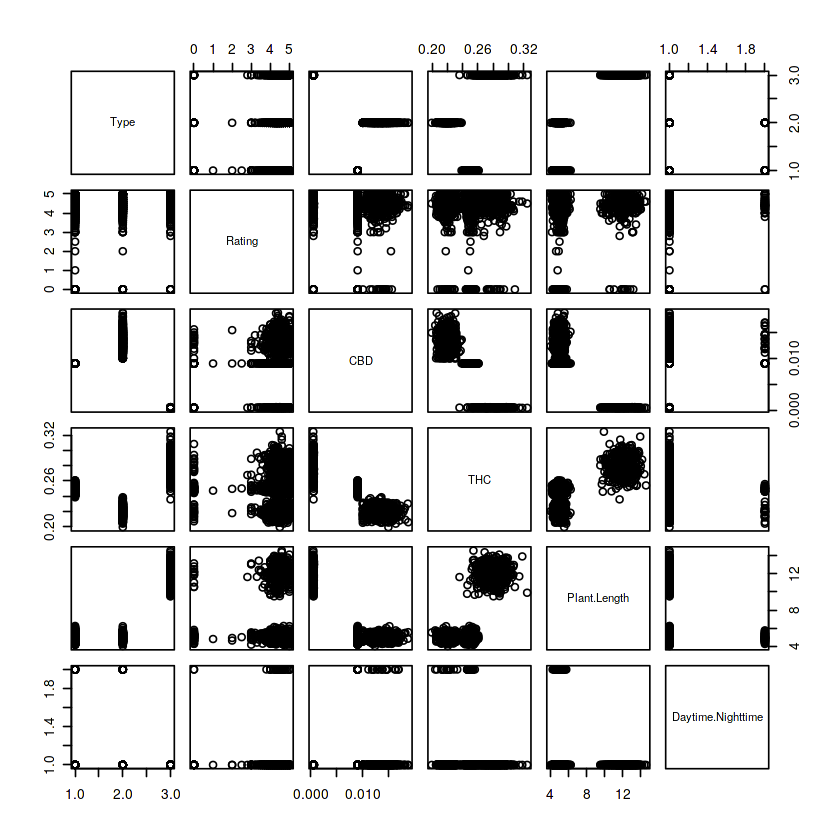

In [9]:
options(repr.plot.width=7, repr.plot.height=7)
pairs(data[,2:7])

**After observing the above pairplot, we developed the following research questions:**
1. Ratings are similar across the different types.
2. CBD levels are different across the type.
3. THC levels are different across the type.
4. Plant lengths are different across type.
5. There is a correlation between CBD and THC levels.
6. There is a correlation between plant length and THC levels.

For each of these observations, we will conduct statistical tests to determine their significance.

**1. CBD levels are different across the type of cannabis.**

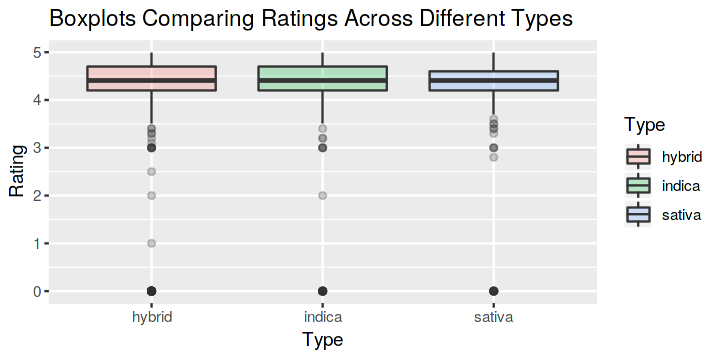

In [10]:
options(repr.plot.width=6, repr.plot.height=3)
p = ggplot(data=data, aes(x=Type, y=Rating, fill=Type)) + geom_boxplot(alpha=0.25) + ggtitle('Boxplots Comparing Ratings Across Different Types')
p

The above boxplot comparing the rating distribution across different types suggest that all types of cannabis are equally favorable. We will conduct an anova test to validate our hypothesis.

In [11]:
summary(aov(data$Rating ~ data$Type))

              Df Sum Sq Mean Sq F value Pr(>F)
data$Type      2    1.4  0.7238   1.035  0.356
Residuals   2347 1642.0  0.6996               

The anova test validates that there is not a difference in CBD levels between the different types. However, because the distribution of ratings for each type seems heavily skewed, the assumptions for anova are not met. We must first eliminate outliers.

Warning message:
“Removed 104 rows containing non-finite values (stat_density).”Warning message:
“Removed 104 rows containing non-finite values (stat_density).”

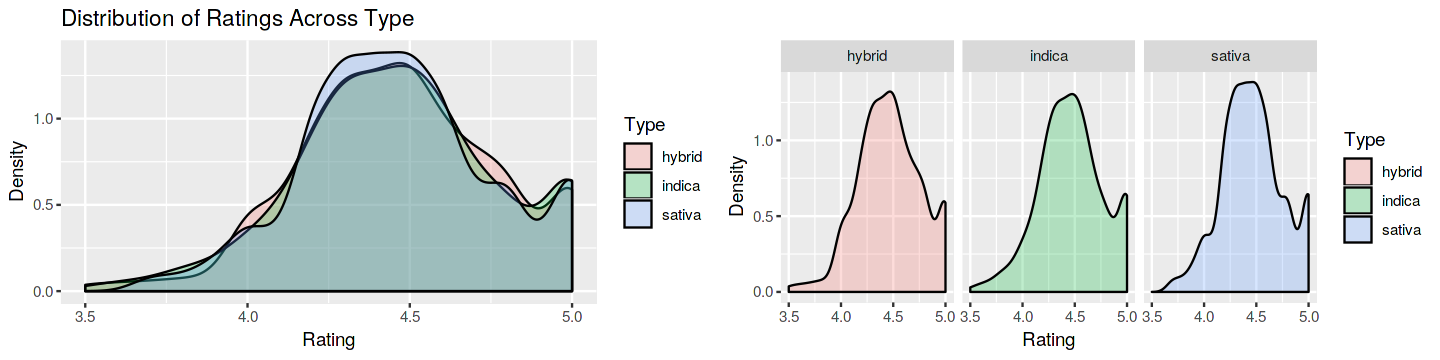

In [12]:
rm_outliers = function(x) { # function to remove outliers from vector
    qnt = quantile(x, probs=c(.25, .75), na.rm = TRUE)
    y = x
    y[x < (qnt[1] - 1.5 * IQR(x, na.rm = TRUE))] = NA
    y[x > (qnt[2] + 1.5 * IQR(x, na.rm = TRUE))] = NA
    y
}

aovdata = data

for (type in unique(aovdata$Type)) { # remove rating outliers from each type
    aovdata[aovdata$Type == type,'Rating'] = rm_outliers(aovdata[aovdata$Type == type,'Rating'])
}

options(repr.plot.width=12, repr.plot.height=3)
p = ggplot(data=aovdata, aes(x=Rating, fill=Type)) + geom_density(alpha=0.25) + ylab('Density') + ggtitle('Distribution of Ratings Across Type')
p1 = p + facet_wrap(~Type) + ggtitle('')
grid.arrange(p, p1, nrow=1)

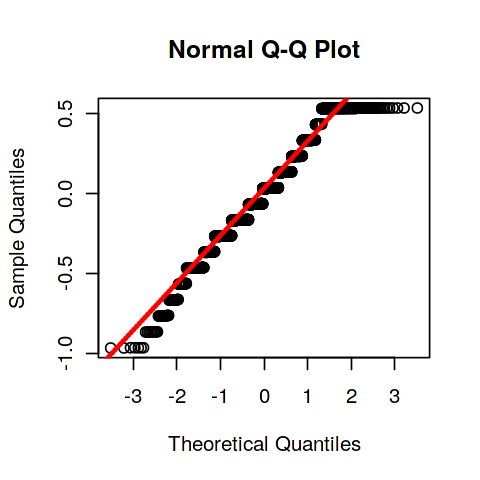

In [13]:
options(repr.plot.width=4, repr.plot.height=4)
ratings.type.aov = aov(aovdata$Rating ~ aovdata$Type)
qqnorm(ratings.type.aov$residuals)
qqline(ratings.type.aov$residuals, lwd=3, col='red', lty=3)

In [14]:
for (type in unique(aovdata$Type)) {
    print(sd(data[aovdata$Type == type, 'Rating']))
}

[1] 0.8859433
[1] 0.8248468
[1] 0.7509536


After removing outliers, we can see that the residuals are approximately normally distributed and the variances across each type are mostly similar. Thus, we can proceed again with the anova test.

In [15]:
summary(ratings.type.aov)

               Df Sum Sq Mean Sq F value Pr(>F)
aovdata$Type    2    0.0 0.00186    0.02   0.98
Residuals    2243  206.5 0.09207               
104 observations deleted due to missingness

We have enough evidence to conclude that all types of cannabis are equally favorable.

**2. CBD levels are different across the type.**

Like done above, let's make a boxplot comparing CBD levels across different cannabis types. 

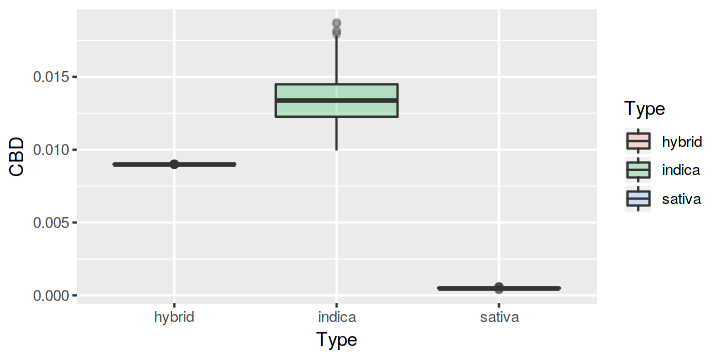

In [16]:
options(repr.plot.width=6, repr.plot.height=3)
p = ggplot(data=data, aes(x=Type, y=CBD, fill=Type)) + geom_boxplot(alpha=0.25)
p

The boxplot shows very clearly that CBD levels are the highest in indica strains, followed by hybrid strains, and ending with sativa strains. We will conduct an anova test to verify this claim. 

In [17]:
summary(aov(data$CBD ~ data$Type))

              Df  Sum Sq  Mean Sq F value Pr(>F)    
data$Type      2 0.04531 0.022657   30170 <2e-16 ***
Residuals   2347 0.00176 0.000001                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The anova test validates that there is indeed a difference in CBD levels between the different types. However, because the variances of CBD levels across the different types are not equal, the assumptions for anova are not met, and the test could be misleading.

**3. THC levels are different across the type.**

Let's make a boxplot comparing THC levels across different cannabis types.

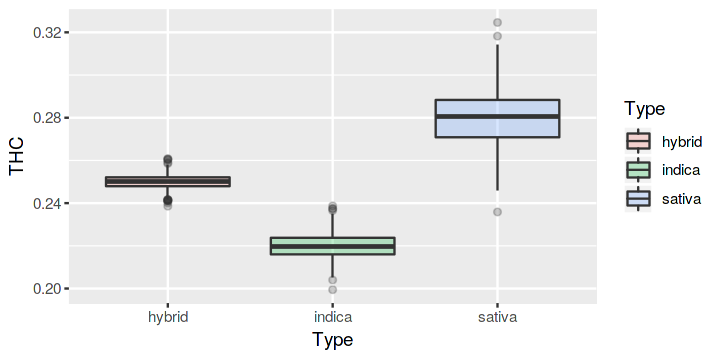

In [18]:
p = ggplot(data=data, aes(x=Type, y=THC, fill=Type)) + geom_boxplot(alpha=0.25)
p

The boxplot suggests that sativas have the highest THC levels, followed by hybrids, and ending with indicas. We will conduct an anova test to validate this hypothesis.

In [19]:
thc.species.aov = aov(data$THC~data$Type)
summary(thc.species.aov)

              Df Sum Sq Mean Sq F value Pr(>F)    
data$Type      2 0.9968  0.4984   11233 <2e-16 ***
Residuals   2347 0.1041  0.0000                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The anova test validates this difference. In this example, it is not as clear if assumptions for anova are met, so we will check to ensure variances of THC across the different types are the same and that the residuals are normally distributed. 

In [20]:
for (type in unique(data$Type)) {
    print(sd(data[data$Type == type, 'THC']))
}

[1] 0.003078918
[1] 0.01251814
[1] 0.005849038


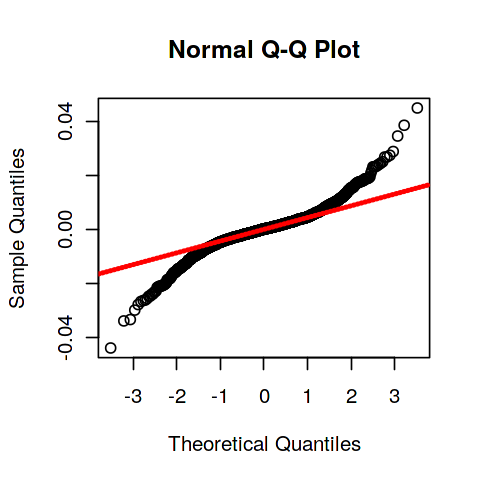

In [21]:
options(repr.plot.width=4, repr.plot.height=4)
qqnorm(thc.species.aov$residuals)
qqline(thc.species.aov$residuals, lwd=3, col='red', lty=3)

It seems like the variances of CBD levels are somewhat simliar, except for hybrid strains which seem to have a higher variance. The qqplot also suggests that the residuals could follow an approximate normal distribution; however, there could potentially be some skewness.

**4. Plant lengths are different across type.**

Let's make a boxplot comparing plant lengths across different cannabis types.

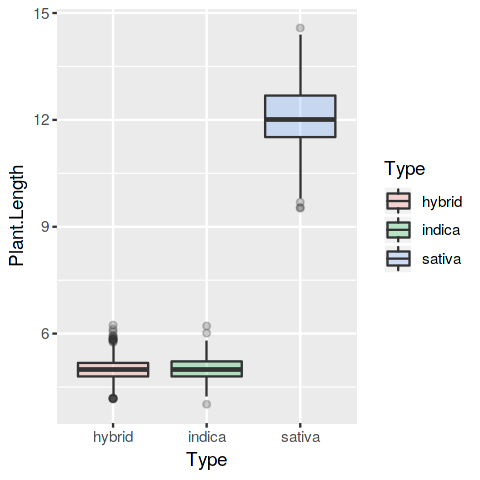

In [22]:
p = ggplot(data=data, aes(x=Type, y=Plant.Length, fill=Type)) + geom_boxplot(alpha=0.25)
p

The boxplot suggests that sativas have the highest plant lengths, while hybrids and indicas have lower, similar plant lengths. We will conduct an anova test and TukeyHSD intervals to validate this hypothesis.

In [23]:
length.type.aov = aov(data$Plant.Length ~ data$Type)
summary(length.type.aov)

              Df Sum Sq Mean Sq F value Pr(>F)    
data$Type      2  17762    8881   37846 <2e-16 ***
Residuals   2347    551       0                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The anova test validates this difference. However, the test could be somewhat misleading since the variance of plant lengths for sativas is much higher than that of other types.

In [24]:
TukeyHSD(length.type.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = data$Plant.Length ~ data$Type)

$`data$Type`
                    diff         lwr       upr    p adj
indica-hybrid 0.00685314 -0.04711092 0.0608172 0.952283
sativa-hybrid 7.05006560  6.98682824 7.1133030 0.000000
sativa-indica 7.04321246  6.97407784 7.1123471 0.000000


The TukeyHSD interval suggests that hybrids and sativas and indicas and sativas differ significantly in their average plant lengths.

**5. There is a correlation between CBD and THC levels.**

We will conduct a correlation test (t-test) to verify this hypothesis.

In [25]:
cor.test(data$THC, data$CBD)


	Pearson's product-moment correlation

data:  data$THC and data$CBD
t = -106.26, df = 2348, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9165759 -0.9026353
sample estimates:
      cor 
-0.909862 


The test validates that there is indeed a correlation between the two variables, as the pairs plot above suggests. 

**6. There is a correlation between plant length and THC levels.**

We will conduct an F to verify this hypothesis.

In [26]:
summary(aov(lm(data$Plant.Length ~ data$THC)))

              Df Sum Sq Mean Sq F value Pr(>F)    
data$THC       1   9629    9629    2604 <2e-16 ***
Residuals   2348   8684       4                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The test verifies that there is evidence to conclude that there is correlation between THC and plant length, as the pairs plot above suggests.

### Model Fitting & Evaluation:

**Multiple Linear Regression Model:**

Let's build a model we can use to predict THC levels, given values for all other numerical and categorical features. We will eliminate two-way interactions to prevent slow runtimes for later parts.

In [27]:
full.mod = lm(THC~., data=data[,2:73]) # eliminate "Strains" and "Description" features

We will perform the backwards stepwise procedure to select a good-fitting reduced model.

In [28]:
red.mod = step(full.mod)

Start:  AIC=-23506.92
THC ~ Type + Rating + CBD + Plant.Length + Daytime.Nighttime + 
    E.Talkative + E.Giggly + E.Tingly + E.Hungry + E.Energetic + 
    E.Euphoric + E.Creative + E.Sleepy + E.Relaxed + E.Aroused + 
    E.Uplifted + E.Dry + E.Mouth + E.Focused + E.None + E.Happy + 
    F.Pine + F.Pungent + F.Tropical + F.Sweet + F.Pear + F.Pineapple + 
    F.Chestnut + F.Peach + F.Honey + F.Lime + F.Vanilla + F.Menthol + 
    F.Mint + F.Violet + F.Spicy.Herbal + F.Lavender + F.Strawberry + 
    F.Blue + F.Cheese + F.Skunk + F.Tar + F.Mango + F.Diesel + 
    F.Fruit + F.Pepper + F.Apple + F.Sage + F.Ammonia + F.Grape + 
    F.Minty + F.Flowery + F.Blueberry + F.Plum + F.Tobacco + 
    F.None + F.Woody + F.Grapefruit + F.Tree + F.Apricot + F.Berry + 
    F.Chemical + F.Orange + F.Rose + F.Earthy + F.Coffee + F.Tea + 
    F.Lemon + F.Nutty + F.Citrus + F.Butter


Step:  AIC=-23506.92
THC ~ Type + Rating + CBD + Plant.Length + Daytime.Nighttime + 
    E.Talkative + E.Giggly + E.Tingly + 

The procedure produced a model with the lowest AIC of -23586.61. The selected features are Type, CBD, Plant.Length, E.Creative, F.Pine, F.Pineapple, F.Lime, F.Violet, F.Strawberry, F.Blue, F.Mango, F.Pepper, F.Woody, F.Apricot, F.Coffee, F.Lemon, and F.Citrus.


In [29]:
print('Full Model Adjusted R^2:')
summary(full.mod)$adj.r.squared
print('Reduced Model Adjusted R^2:')
summary(red.mod)$adj.r.squared

[1] "Full Model Adjusted R^2:"


[1] 0.9062533

[1] "Reduced Model Adjusted R^2:"


[1] 0.9073916

The reduced model has an adjusted R^2 higher than the full model's. It appears that the reduced model accounts for ~90.74% of the variability THC levels.

In [30]:
anova(red.mod, full.mod)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2331,0.1011798,NA,NA,NA,NA
2279,0.1001386,52,0.001041189,0.4556894,0.9997227


Using a partial F test to compare the two models, it does not seem like the added predictors in the full model add anything of significance. 

In [31]:
mlr.mod = red.mod # save model for later

**Multinomial Logistic Regression Model:**

Let's build a model we can use to predict the type of cannabis, given values for all other numerical and categorical features. We will consider Rating, CBD, THC, Plant.Length, Daytime.Nighttime, E.Happy, E.Relaxed, E.Euphoric, E.Uplifted, and F.Earthy, F.Sweet, and F.Citrus as the features. These particular effects were selected, as they are the most prevalent in the dataset (shown in descriptive statistics) section.

We will build two models: one including two-way interactions, and the other excluding them.

In [32]:
full.mod = multinom(Type~(CBD+THC+Plant.Length+Daytime.Nighttime+E.Happy+E.Relaxed+E.Euphoric+E.Uplifted+F.Earthy+F.Sweet+F.Citrus)^2, data=data)

# weights:  204 (134 variable)
initial  value 2581.738878 
iter  10 value 1454.007705
iter  20 value 1049.779106
iter  30 value 263.308475
iter  40 value 19.521374
iter  50 value 0.242455
iter  60 value 0.001554
final  value 0.000048 
converged


In [33]:
summary(full.mod)

Call:
multinom(formula = Type ~ (CBD + THC + Plant.Length + Daytime.Nighttime + 
    E.Happy + E.Relaxed + E.Euphoric + E.Uplifted + F.Earthy + 
    F.Sweet + F.Citrus)^2, data = data)

Coefficients:
       (Intercept)       CBD        THC Plant.Length Daytime.NighttimeNT
indica   -735.3979 470.02488 -2184.9055     870.2064           317.66626
sativa  -1513.5053 -19.33208  -587.4575     476.3946           -87.01826
        E.Happy E.Relaxed E.Euphoric E.Uplifted  F.Earthy   F.Sweet  F.Citrus
indica 356.9295  674.2926   220.4044  377.50550 321.79124 -33.08875 -16.15415
sativa 479.8299  237.5507  -148.0392  -83.29497  53.43594 116.76827 -23.88340
         CBD:THC CBD:Plant.Length CBD:Daytime.NighttimeNT CBD:E.Happy
indica  78.58890        1713.3090               23.169012   364.27528
sativa -11.06462        -169.7503                2.907868    28.68137
       CBD:E.Relaxed CBD:E.Euphoric CBD:E.Uplifted CBD:F.Earthy CBD:F.Sweet
indica     406.08265      331.05008      283.41448    222.616

In [34]:
alt.mod = multinom(Type~(CBD+THC+Plant.Length+Daytime.Nighttime+E.Happy+E.Relaxed+E.Euphoric+E.Uplifted+F.Earthy+F.Sweet+F.Citrus), data=data)

# weights:  39 (24 variable)
initial  value 2581.738878 
iter  10 value 1190.915944
iter  20 value 97.016086
iter  30 value 6.096602
iter  40 value 1.570567
iter  50 value 0.192752
iter  60 value 0.023733
iter  70 value 0.002115
iter  80 value 0.002037
iter  90 value 0.001045
iter 100 value 0.001043
final  value 0.001043 
stopped after 100 iterations


In [35]:
summary(alt.mod)

Call:
multinom(formula = Type ~ (CBD + THC + Plant.Length + Daytime.Nighttime + 
    E.Happy + E.Relaxed + E.Euphoric + E.Uplifted + F.Earthy + 
    F.Sweet + F.Citrus), data = data)

Coefficients:
       (Intercept)        CBD        THC Plant.Length Daytime.NighttimeNT
indica     892.748 694.697193 -4188.6648     16.36995            6.367149
sativa    -197.407  -7.600605  -118.8366     26.66145            6.878144
        E.Happy E.Relaxed E.Euphoric E.Uplifted  F.Earthy    F.Sweet   F.Citrus
indica 11.80072  13.17476 -6.7540391   2.265793 -6.327227   2.746926 -20.010336
sativa 12.62060 -10.22598 -0.7395622  47.761859 -6.829327 -33.447716  -4.283824

Std. Errors:
       (Intercept)         CBD        THC Plant.Length Daytime.NighttimeNT
indica   3089.8752 9862.749365 6363.52568     785.1335        2.484968e+03
sativa    151.6785    1.686079   24.10593     110.7739        1.634908e-02
        E.Happy E.Relaxed E.Euphoric E.Uplifted F.Earthy   F.Sweet  F.Citrus
indica 690.1106  1001.80

We will consider AIC for model evaluation, and it seems that the model without two-way interactions seems to be better, as its AIC is ~48 (as opposed to ~268).

In [36]:
anova(alt.mod, full.mod)

Model,Resid. df,Resid. Dev,Test,Df,LR stat.,Pr(Chi)
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
(CBD + THC + Plant.Length + Daytime.Nighttime + E.Happy + E.Relaxed + E.Euphoric + E.Uplifted + F.Earthy + F.Sweet + F.Citrus),4676,2.085946e-03,,NA,NA,NA
(CBD + THC + Plant.Length + Daytime.Nighttime + E.Happy + E.Relaxed + E.Euphoric + E.Uplifted + F.Earthy + F.Sweet + F.Citrus)^2,4566,9.649255e-05,1 vs 2,110,0.001989454,1


The above partial F test also suggests that the model without two-way interactions is better.

In [37]:
multi.log.reg.mod = alt.mod # save model for later

### Model Testing:

We collected data from cannabis users in California. When surveying them, we only considered the features used to construct the two models above:
<br>
<br>
**Rating, Type, CBD, THC, Plant.Length, Daytime.Nighttime, E.Creative, E.Uplifted, E.Happy, E.Relaxed, F.Pine, F.Pineapple, F.Lime, F.Violet, F.Strawberry, F.Blue, F.Mango, F.Pepper, F.Woody, F.Apricot, F.Coffee, F.Lemon, F.Earthy, F.Sweet, and F.Citrus.**

In [40]:
survey = read.csv('Data/survey.csv')
head(survey)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'Data/survey.csv'”

Rating,Type,CBD,THC,Plant.Length,Daytime.Nighttime,E.Creative,E.Happy,E.Relaxed,E.Uplifted,⋯,F.Blue,F.Mango,F.Pepper,F.Woody,F.Apricot,F.Coffee,F.Lemon,F.Earthy,F.Sweet,F.Citrus
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4.0,hybrid,0.0100,0.25,5.48,DT,1,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
5.0,sativa,0.0000,0.28,12.20,DT,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
4.2,indica,0.0150,0.22,5.11,DT,0,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
4.3,sativa,0.0001,0.27,13.20,DT,0,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0


Let's use the first model to predict THC level based on Type, CBD, Plant.Length, E.Creative, F.Pine, F.Pineapple, F.Lime, F.Violet, F.Strawberry, F.Blue, F.Mango, F.Pepper, F.Woody, F.Apricot, F.Coffee, F.Lemon, and F.Citrus.

In [41]:
predict(mlr.mod, survey[,c('Type', 'CBD', 'Plant.Length', 'E.Creative', 'F.Pine', 'F.Pineapple', 'F.Lime', 'F.Violet', 'F.Strawberry', 'F.Blue', 'F.Mango', 'F.Pepper', 'F.Woody', 'F.Apricot', 'F.Coffee', 'F.Lemon', 'F.Citrus')])

1         2         3         4 
0.2500111 0.2805359 0.2192543 0.2809517

Comparing the above output with the true values recorded in the survey data shows that our multiple linear regresion model is sucessful in predicting the correct THC levels.

Let's now use the second model to predict type of cannabis based on CBD, THC, Plant.Length, Daytime.Nighttime, E.Happy, E.Relaxed, E.Euphoric, E.Uplifted, F.Earthy, F.Sweet, and F.Citrus.

In [43]:
predict(multi.log.reg.mod, survey[,c('CBD', 'THC', 'Plant.Length', 'Daytime.Nighttime', 'E.Happy', 'E.Relaxed', 'E.Euphoric', 'E.Uplifted', 'F.Earthy', 'F.Sweet', 'F.Citrus')], type='probs')

hybrid,indica,sativa
1.000000e+00,5.756464e-15,6.670465e-35
1.506808e-62,1.820142e-96,1.000000e+00
5.465113e-38,1.000000e+00,1.701679e-54
4.002333e-80,1.380501e-83,1.000000e+00


Comparing the above output with the true values recorded in the survey data shows that our multinomial logistic regresion model is sucessful in predicting the correct cannabis type.

### Analyzing Descriptions:

We will construct word clouds to take a closer look at descriptions for each type of cannabis.

In [44]:
library('tm') # import req libraries
library('SnowballC')
library('wordcloud')
library('RColorBrewer')

Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:ggplot2’:

    annotate

Loading required package: RColorBrewer


**Indica:**

In [45]:
docs = Corpus(VectorSource(data[data$Type == 'indica','Description']))
docs = tm_map(docs, content_transformer(tolower))
docs = tm_map(docs, removeNumbers)
docs = tm_map(docs, removeWords, c(stopwords("english"), 'strain'))
docs = tm_map(docs, removePunctuation)
docs = tm_map(docs, stripWhitespace)

Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, removeWords, c(stopwords("english"), :
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
“transformation drops documents”

In [46]:
doc.term.mat = TermDocumentMatrix(docs)
v = sort(rowSums(as.matrix(doc.term.mat)),decreasing=TRUE)
word.freq = data.frame(word = names(v),freq=v)
head(word.freq)

,word,freq
,<fct>,<dbl>
indica,indica,517
kush,kush,448
effects,effects,425
indicadominant,indicadominant,268
purple,purple,243
sweet,sweet,243


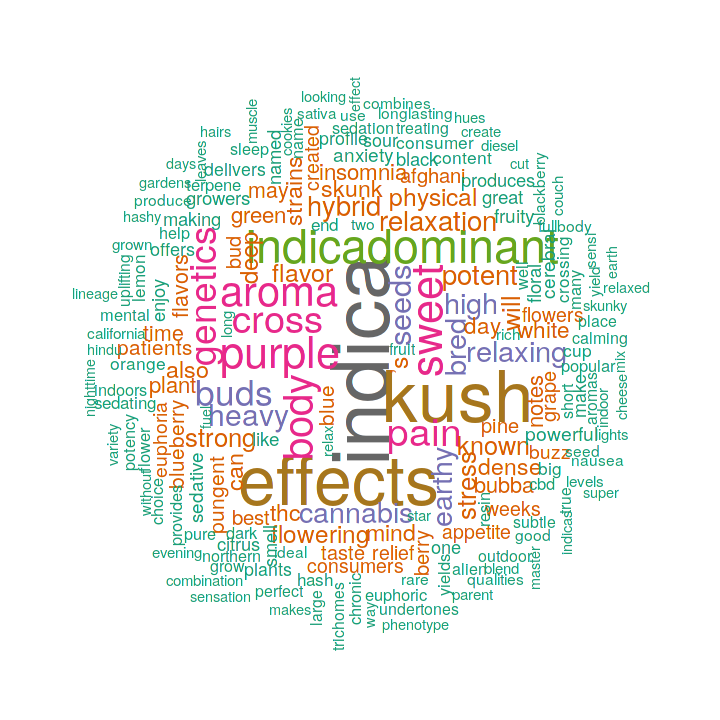

In [50]:
options(repr.plot.width=6, repr.plot.height=6)
wordcloud(words = word.freq$word, freq = word.freq$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

**Hybrid:**

In [51]:
docs = Corpus(VectorSource(data[data$Type == 'hybrid','Description']))
docs = tm_map(docs, content_transformer(tolower))
docs = tm_map(docs, removeNumbers)
docs = tm_map(docs, removeWords, c(stopwords("english"), 'strain'))
docs = tm_map(docs, removePunctuation)
docs = tm_map(docs, stripWhitespace)

Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, removeWords, c(stopwords("english"), :
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
“transformation drops documents”

In [52]:
doc.term.mat = TermDocumentMatrix(docs)
v = sort(rowSums(as.matrix(doc.term.mat)),decreasing=TRUE)
word.freq = data.frame(word = names(v),freq=v)
head(word.freq)

,word,freq
,<fct>,<dbl>
hybrid,hybrid,1005
effects,effects,769
kush,kush,492
aroma,aroma,473
cross,cross,431
sweet,sweet,406


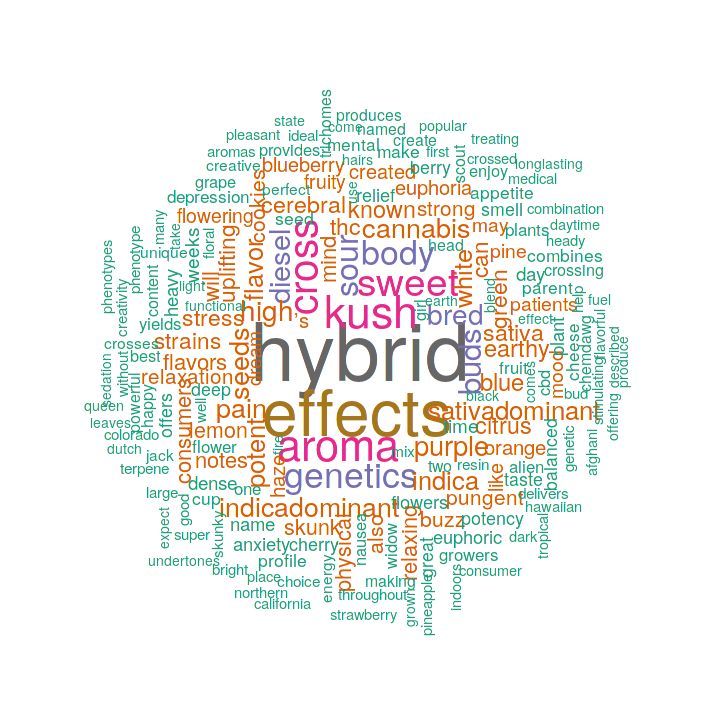

In [53]:
wordcloud(words = word.freq$word, freq = word.freq$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

**Sativa:**

In [54]:
docs = Corpus(VectorSource(data[data$Type == 'sativa','Description']))
docs = tm_map(docs, content_transformer(tolower))
docs = tm_map(docs, removeNumbers)
docs = tm_map(docs, removeWords, c(stopwords("english"), 'strain'))
docs = tm_map(docs, removePunctuation)
docs = tm_map(docs, stripWhitespace)

Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, removeWords, c(stopwords("english"), :
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
“transformation drops documents”

In [55]:
doc.term.mat = TermDocumentMatrix(docs)
v = sort(rowSums(as.matrix(doc.term.mat)),decreasing=TRUE)
word.freq = data.frame(word = names(v),freq=v)
head(word.freq)

,word,freq
,<fct>,<dbl>
sativa,sativa,378
effects,effects,279
haze,haze,270
sativadominant,sativadominant,152
aroma,aroma,150
sweet,sweet,140


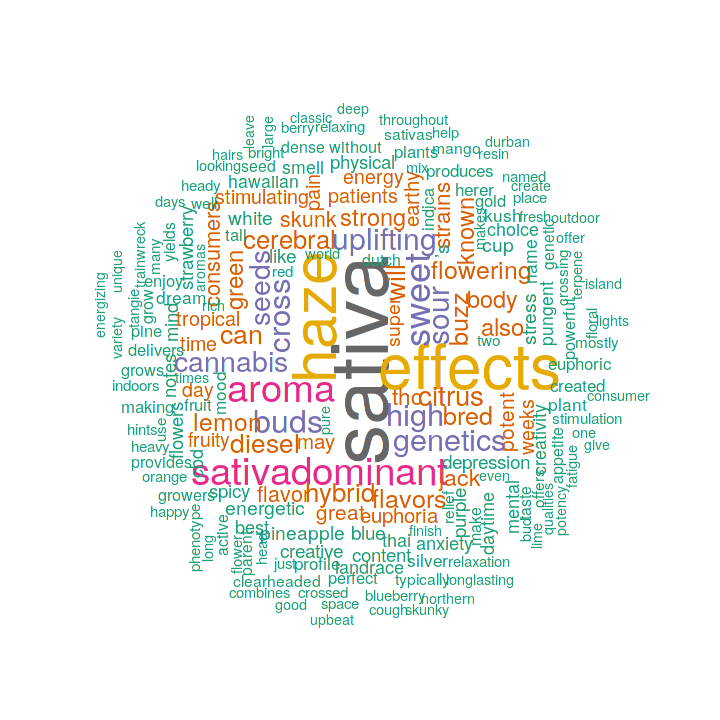

In [56]:
wordcloud(words = word.freq$word, freq = word.freq$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))